# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [ ]:
from src.make_db import create_movies_db
import pandas as pd

In [ ]:
create_movies_db()

![movies.db schema](images/movies_db_schema.png)

In [100]:
#Importing all the packages I need
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
#movies and their worldwide gross
cur.execute('''SELECT movie, worldwide_gross
FROM tn_movie_budgets 
''')
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
df.head(10)





,movie,worldwide_gross
0,Avatar,"$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$1,045,663,875"
2,Dark Phoenix,"$149,762,350"
3,Avengers: Age of Ultron,"$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$1,316,721,747"
5,Star Wars Ep. VII: The Force Awakens,"$2,053,311,220"
6,Avengers: Infinity War,"$2,048,134,200"
7,Pirates of the Caribbean: At Worldâs End,"$963,420,425"
8,Justice League,"$655,945,209"
9,Spectre,"$879,620,923"


In [102]:
# spits out runtime and title for imdb_title_basics
runtime = cur.execute('''
SELECT runtime_minutes, original_title 
FROM imdb_title_basics
ORDER BY runtime_minutes DESC ;
''')
runtime = pd.DataFrame(cur.fetchall())
runtime.columns = [i[0] for i in cur.description]
runtime.head(10)



,runtime_minutes,original_title
0,51420.0,Logistics
1,14400.0,Modern Times Forever
2,6017.0,Nari
3,6000.0,Hunger!
4,5460.0,London EC1
5,4980.0,Ember Glow
6,4200.0,Foreclose
7,4080.0,Nieuwe Tieten
8,3450.0,City of Eternal Spring
9,3077.0,A 2nd generation film


In [103]:
#joins tn_movie_budgets and imdb_title_basics to give us runtime, original title and worldwide gross
rtandgross = cur.execute('''
SELECT runtime_minutes, original_title, worldwide_gross
FROM imdb_title_basics JOIN tn_movie_budgets 
ON original_title = movie 
''')
rtandgross = pd.DataFrame(cur.fetchall())
rtandgross.columns = [i[0] for i in cur.description]
#prints the top 
rtandgross.head(10)
rtandgross['worldwide_gross'] = rtandgross['worldwide_gross'].str.replace('$', '').str.replace(',', '')
rtandgross['worldwide_gross'] = rtandgross['worldwide_gross'].astype(int)

In [104]:
rtandgross.head(10)

,runtime_minutes,original_title,worldwide_gross
0,91.0,Foodfight!,73706
1,NaN,Mortal Kombat,122133227
2,88.0,The Overnight,1165996
3,124.0,On the Road,9313302
4,114.0,The Secret Life of Walter Mitty,187861183
5,114.0,A Walk Among the Tombstones,62108587
6,124.0,Jurassic World,1648854864
7,119.0,The Rum Diary,21544732
8,92.0,The Three Stooges,54052249
9,98.0,Anderson's Cross,0


In [125]:
#puts it in order by worldwide_gross
orderedrtandgross =rtandgross.sort_values('worldwide_gross', ascending=False)
orderedrtandgross
orderedrtandgross=orderedrtandgross.dropna(subset=['runtime_minutes'])
orderedrtandgross.drop_duplicates('original_title')
orderedrtandgross.head(10)

,runtime_minutes,original_title,worldwide_gross
3414,115.0,Titanic,2208208395
2416,149.0,Avengers: Infinity War,2048134200
6,124.0,Jurassic World,1648854864
97,143.0,The Avengers,1517935897
1664,141.0,Avengers: Age of Ultron,1403013963
1069,134.0,Black Panther,1348258224
2645,128.0,Jurassic World: Fallen Kingdom,1305772799
469,93.0,Frozen,1272469910
1553,102.0,Frozen,1272469910
1870,129.0,Beauty and the Beast,1259199706


In [120]:
#drops all duplicates
orderedrtandgross.drop_duplicates()
orderedrtandgross

,runtime_minutes,original_title,worldwide_gross
3223,360.0,Stuck,67505
3193,312.0,The Collector,10473836
2774,189.0,Werk ohne Autor,4331152
2437,184.0,Hamlet,7129670
2436,184.0,Hamlet,2419669
...,...,...,...
3525,NaN,The Girl on the Train,174278214
3530,NaN,Sisters,106030660
3532,NaN,Trapped,6916869
3533,NaN,The Promise,10551417


In [111]:
#orderedrtandgross.groupby('original_title', group_keys=False).apply(lambda x: x.loc[x.worldwide_gross.idxmax()])
orderedrtandgross

,runtime_minutes,original_title,worldwide_gross
3223,360.0,Stuck,67505
3193,312.0,The Collector,10473836
2774,189.0,Werk ohne Autor,4331152
2437,184.0,Hamlet,7129670
2436,184.0,Hamlet,2419669
...,...,...,...
3525,NaN,The Girl on the Train,174278214
3530,NaN,Sisters,106030660
3532,NaN,Trapped,6916869
3533,NaN,The Promise,10551417


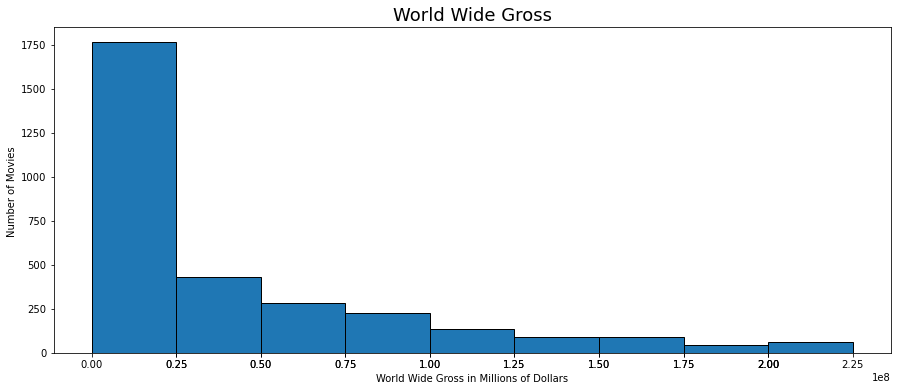

In [112]:
#Makes a bar plot of all the movies that have diffrent world wide gross
x = orderedrtandgross.worldwide_gross
df = pd.DataFrame({"x":x})
fig, ax = plt.subplots(figsize=(15,6))
bins= [0,25000000,25000000,50000000,50000000,75000000,75000000,100000000,
       100000000,125000000,125000000,150000000,150000000,175000000,175000000,200000000,
       200000000,200000000,225000000 ]
plt.hist(df.values, bins=bins, edgecolor="k")
plt.xticks(bins)
plt.xlabel('World Wide Gross in Millions of Dollars')
plt.ylabel('Number of Movies ')
ax.set_title("World Wide Gross", fontsize=18)

plt.show()

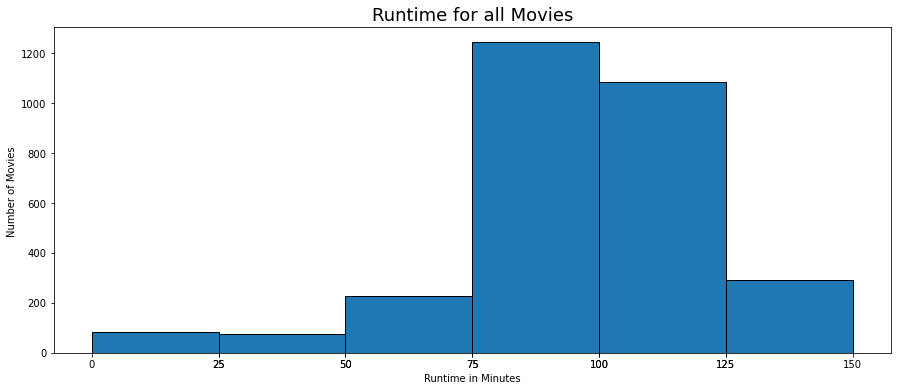

In [113]:
#Makes a bar plot of the movies that have diffrent run times
x = orderedrtandgross.runtime_minutes
df = pd.DataFrame({"x":x})
fig, ax = plt.subplots(figsize=(15,6))
bins= [0,25 ,25,50 ,50,75 ,75,100 ,100,125 ,125 ,150]
plt.hist(df.values, bins=bins, edgecolor="k")
plt.xticks(bins)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Number of Movies ')
ax.set_title("Runtime for all Movies", fontsize=18)

plt.show()

In [115]:
#Orders values by runtime
orderedrtandgross =rtandgross.sort_values('runtime_minutes', ascending=False)
orderedrtandgross

,runtime_minutes,original_title,worldwide_gross
3223,360.0,Stuck,67505
3193,312.0,The Collector,10473836
2774,189.0,Werk ohne Autor,4331152
2437,184.0,Hamlet,7129670
2436,184.0,Hamlet,2419669
...,...,...,...
3525,NaN,The Girl on the Train,174278214
3530,NaN,Sisters,106030660
3532,NaN,Trapped,6916869
3533,NaN,The Promise,10551417


In [116]:
#only outputs movies that have more than 1000000 worldwide gross
orderedrtandgros = orderedrtandgross.loc[(orderedrtandgross["worldwide_gross"]>=10000000)& 
                                         (orderedrtandgross["worldwide_gross"]<=3000000000)]

orderedrtandgros                                       


,runtime_minutes,original_title,worldwide_gross
3193,312.0,The Collector,10473836
148,180.0,The Wolf of Wall Street,389870414
3207,172.0,Contact,165900000
504,172.0,Cloud Atlas,130673154
2631,170.0,Sultan,72989781
...,...,...,...
3521,NaN,Diner,12592907
3523,NaN,Never Let Me Go,11173718
3525,NaN,The Girl on the Train,174278214
3530,NaN,Sisters,106030660


In [122]:
#puts data in order of world wide gross
orderedrtandgros.sort_values('worldwide_gross', ascending=False)


,runtime_minutes,original_title,worldwide_gross
3414,115.0,Titanic,2208208395
1734,NaN,Titanic,2208208395
2416,149.0,Avengers: Infinity War,2048134200
6,124.0,Jurassic World,1648854864
97,143.0,The Avengers,1517935897
...,...,...,...
3195,NaN,Dirty Work,10020081
2840,103.0,Dirty Work,10020081
3270,NaN,King Kong,10000650
1360,89.0,Maniac,10000000


In [134]:
#drops duplicates 

orderedrtandgross.drop_duplicates(subset = "original_title", keep=False, inplace=True)
orderedrtandgross.head(10)

,runtime_minutes,original_title,worldwide_gross
3414,115.0,Titanic,2208208395
2416,149.0,Avengers: Infinity War,2048134200
6,124.0,Jurassic World,1648854864
1664,141.0,Avengers: Age of Ultron,1403013963
1069,134.0,Black Panther,1348258224
2645,128.0,Jurassic World: Fallen Kingdom,1305772799
2219,118.0,Incredibles 2,1242520711
2566,136.0,The Fate of the Furious,1234846267
1551,91.0,Minions,1160336173
631,143.0,Aquaman,1146894640


In [95]:
#prints the mean runtime of top ten worldwide grossing movies
import statistics
print(statistics.mean([149, 124, 141, 134, 128, 118, 136, 91, 143, 147]))

131.1


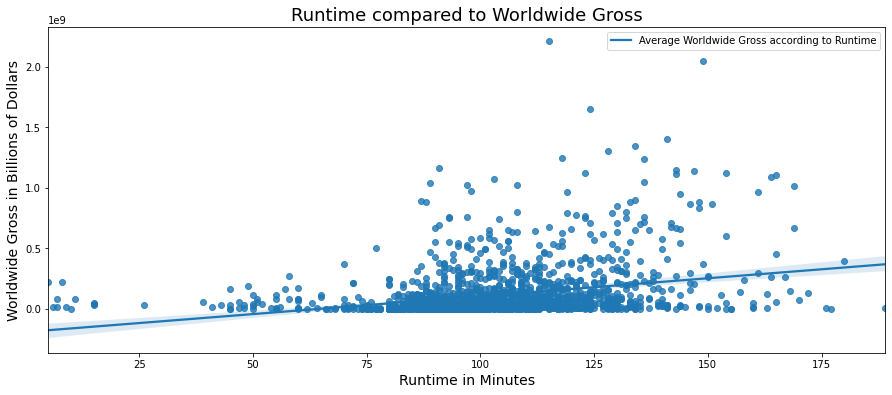

In [135]:
## Creates scatter plot of Runtime vs Worldwide Gross
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Runtime compared to Worldwide Gross", fontsize=18)
sns.regplot(data=orderedrtandgross, x='runtime_minutes', y='worldwide_gross')
ax.set_xlabel("Runtime in Minutes", fontsize=14)
ax.set_ylabel("Worldwide Gross in Billions of Dollars", fontsize=14)
ax.legend(["Average Worldwide Gross according to Runtime"]);

In [137]:
#makes obj of runtime into int
orderedrtandgross['runtime_minutes'] = orderedrtandgross['runtime_minutes'].astype(int)

In [138]:
#just to see my dtypes
orderedrtandgross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 3414 to 1948
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   runtime_minutes  1732 non-null   int64 
 1   original_title   1732 non-null   object
 2   worldwide_gross  1732 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.1+ KB


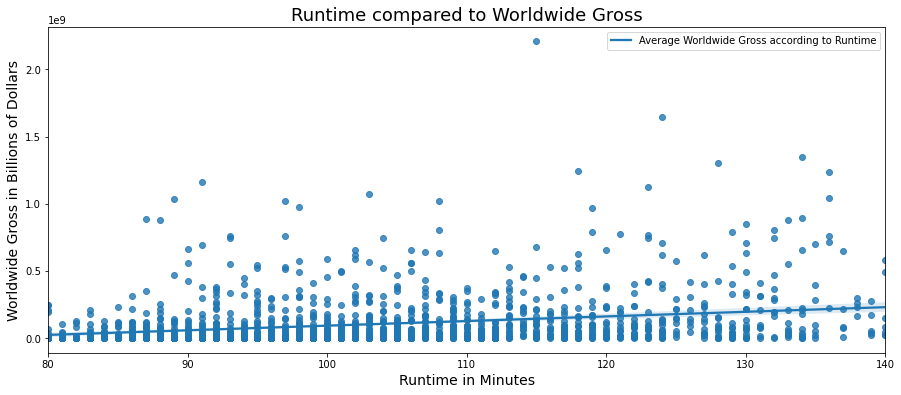

In [139]:
#zooms into a smaller range
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Runtime compared to Worldwide Gross", fontsize=18)
sns.regplot(data=orderedrtandgross[(orderedrtandgross['runtime_minutes']>=80) & (orderedrtandgross['runtime_minutes'] <= 140)], x='runtime_minutes', y='worldwide_gross')
ax.set_xlabel("Runtime in Minutes", fontsize=14)
ax.set_ylabel("Worldwide Gross in Billions of Dollars", fontsize=14)
ax.legend(["Average Worldwide Gross according to Runtime"]);